___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


### Import libraries

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

# Tasks


### 1. Read dataset

In [112]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 2. Check missing values and if there are any dublicate rows or not.

In [60]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [155]:
df.duplicated().value_counts(dropna=False)

False    17414
dtype: int64

### 3. Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)

**Season feature**

In [158]:
season = df.season.value_counts(dropna=False)
season

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [159]:
season.values

array([4394, 4387, 4330, 4303])

In [161]:
season.index

Float64Index([0.0, 1.0, 3.0, 2.0], dtype='float64')

In [162]:
# bar labellarını yazdırırken kullanmak uzere valuesunu enumerate ile nasıl indeksleriz
print(*enumerate(season.values))

(0, 4394) (1, 4387) (2, 4330) (3, 4303)


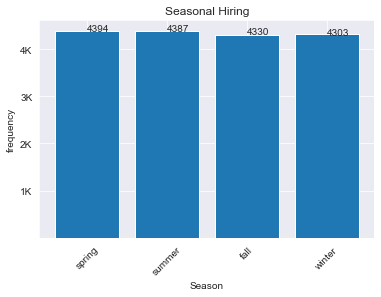

In [171]:
# Matplotlb functional
plt.figure(figsize=(6,4))



plt.bar(x = season.index, height=season.values, data=df)
plt.title("Seasonal Hiring")
plt.xlabel("Season")
plt.ylabel("frequency")


plt.xticks([0,1,2,3], ["spring", "summer", "fall", "winter"], rotation=45)  # icinde liste olarak veririz, 
#ilk mevcutların list, sonra degistirmek istedigimiz

plt.yticks([1000,2000,3000,4000], ["1K", "2K", "3K", "4K"])


x = season.index
y = season.values

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x, y)

plt.show()

In [172]:
# bar labelları eklemenin ikinci yolu

for index, value in enumerate(season.values):
    print(index, value)

0 4394
1 4387
2 4330
3 4303


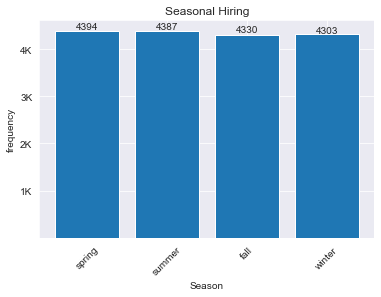

In [173]:
plt.figure(figsize=(6,4))

plt.bar(x = season.index, height=season.values, data=df)
plt.title("Seasonal Hiring")
plt.xlabel("Season")
plt.ylabel("frequency")


plt.xticks([0,1,2,3], ["spring", "summer", "fall", "winter"], rotation=45)  # icinde liste olarak veririz, 
#ilk mevcutların list, sonra degistirmek istedigimiz

plt.yticks([1000,2000,3000,4000], ["1K", "2K", "3K", "4K"])

for index, value in enumerate(season.values):
    plt.text(index,
            value,
            str(value),
            va="bottom",
            ha="center")

plt.show()

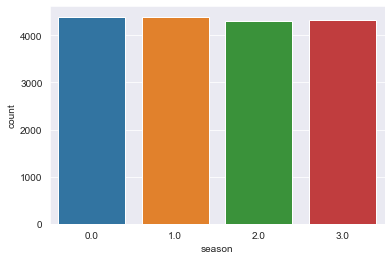

In [62]:
# season seaborn ile
sns.countplot(x="season", data=df);

**is_holiday**

In [175]:
is_holiday = df.is_holiday.value_counts(dropna=False)
is_holiday

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

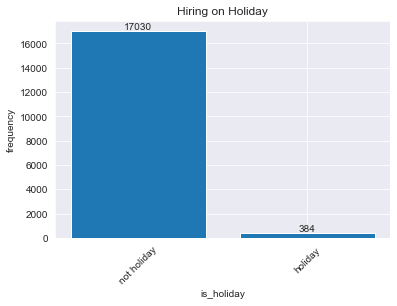

In [180]:
# Matplotlib OOM

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x = is_holiday.index, height=is_holiday.values, data=df)
ax.set_title("Hiring on Holiday")
ax.set_xlabel("is_holiday")
ax.set_ylabel("frequency")

# container metodu ile yazıdralim

for container in ax.containers:
    ax.bar_label(container)

ax.set_xticks([0,1], ["not holiday", "holiday"], rotation=45);

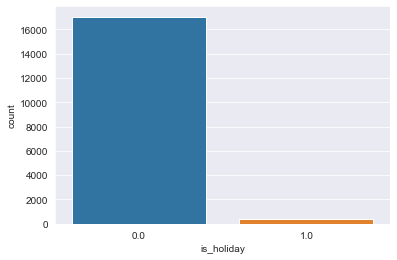

In [63]:
# seaborn countplot ile
sns.countplot(df.is_holiday);

**is_weekend**

In [181]:
# pandas ile:
is_weekend = df.is_weekend.value_counts(dropna=False)
is_weekend


0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

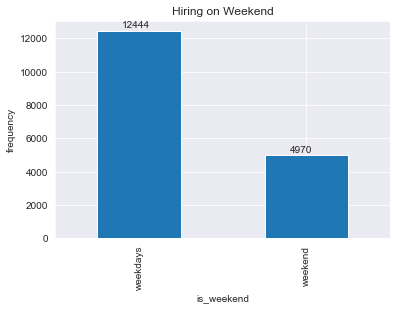

In [189]:
# pandasta plot ve kind ile yapiyorduk

ax = df.is_weekend.value_counts(dropna=False).plot(x = is_weekend.index, y= is_weekend.values, kind="bar")

ax.set_title("Hiring on Weekend")
ax.set_xlabel("is_weekend")
ax.set_ylabel("frequency")

# patch metodu ile yazıdralim. en uzun ve gereksizi:

for p in ax.patches:
    ax.annotate(p.get_height(),
               (p.get_x()+0.15, p.get_height()+200))
# 200 heighte y eksenindeki degerlere gore ayarlanıyor

ax.set_xticks([0,1], ["weekdays", "weekend"]);

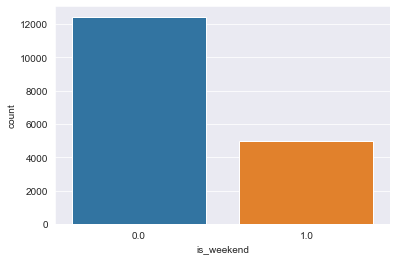

In [28]:
# is_weekend seaborn
sns.countplot(df.is_weekend);

**weather_code**

In [190]:
weather_code = df.weather_code.value_counts(dropna=False)
weather_code

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

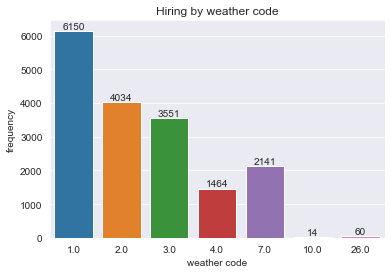

In [191]:

fig, ax = plt.subplots(figsize=(6,4))

sns.countplot(df.weather_code);


ax.set_title("Hiring by weather code")
ax.set_xlabel("weather code")
ax.set_ylabel("frequency")

# container metodu ile yazıdralim

for container in ax.containers:
    ax.bar_label(container)

plt.show()

### 4. Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [64]:
df.dtypes # veya df.info) daha iyi

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [193]:
df.timestamp = pd.to_datetime(df.timestamp)

In [114]:
df.set_index("timestamp", inplace=True)

# bunu df.set_index(df["timestamp"], inplace=True) seklinde yaparsak timesatmp sutunu da kalir

In [33]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 5. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [118]:
df["year_month"] = df.index.strftime("%Y-%m")
df["year"] = df.index.year
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["hour"] = df.index.hour
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,year_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4,2015-01


### 6. Visualize the correlation with a heatmap

In [195]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,-0.068688,0.324423
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,-0.002317,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,-0.006824,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,0.011556,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.001708,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,0.020619,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.144628,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.791975,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.002356,0.000006
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,-0.002876,0.000542


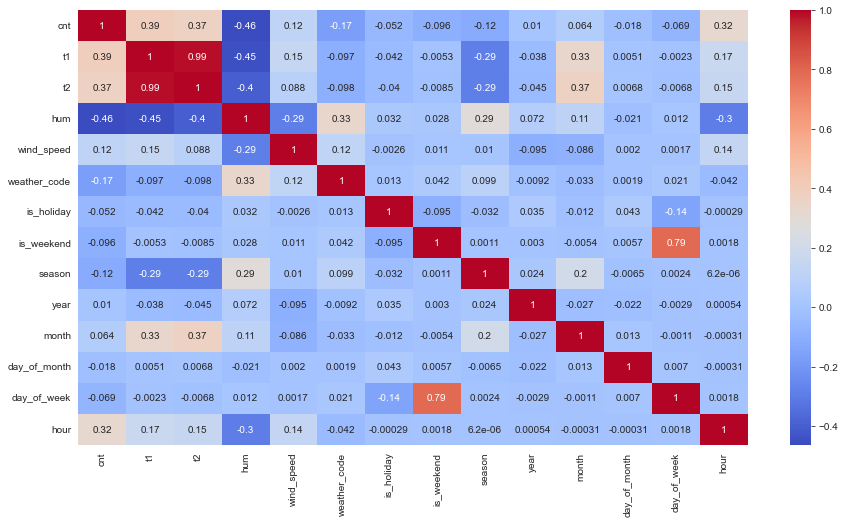

In [196]:
# for all variables
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

In [197]:
matrix = np.triu(df.corr())

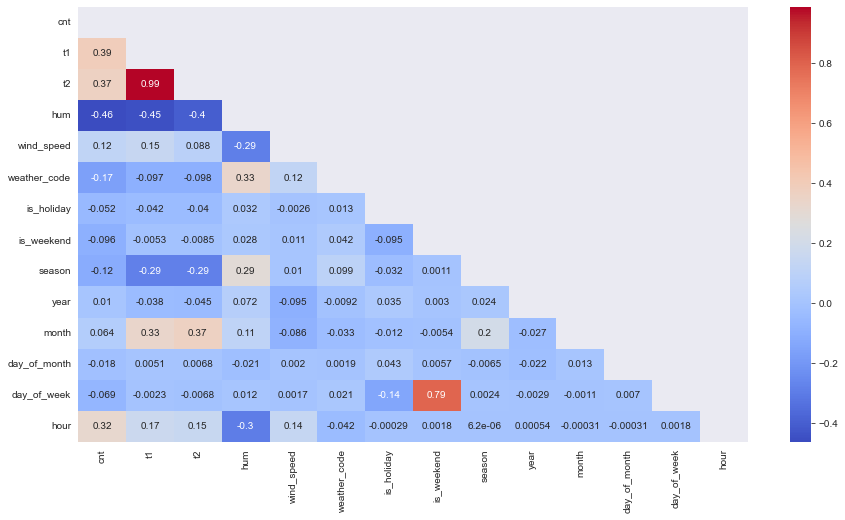

In [199]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", mask = matrix);

# #heatmap in yarısını göreyim yeter diyorsak

In [200]:
df.corr()["cnt"]

cnt             1.000000
t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
weather_code   -0.166633
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
year            0.010046
month           0.063757
day_of_month   -0.017887
day_of_week    -0.068688
hour            0.324423
Name: cnt, dtype: float64

In [201]:
df.corr()[["cnt"]]

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hum,-0.462901
wind_speed,0.116295
weather_code,-0.166633
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
year,0.010046


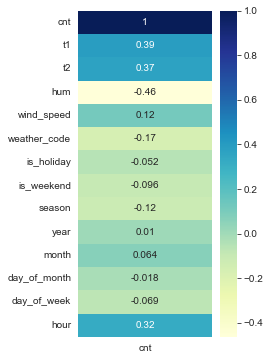

In [202]:
plt.figure(figsize=(3,6))
sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt"), cmap="YlGnBu", annot=True);

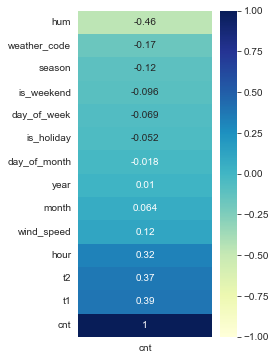

In [203]:
# for the target variable
fig, ax = plt.subplots(figsize=(3,6))
sns.heatmap(df.corr()[["cnt"]].sort_values("cnt"), vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax);
# ax.invert_yaxis()

# df.corr()ile aldigimiz dataframei loc, iloc veya sutun ismi ile ([["cnt"]]) süzeriz. boyoece target variable corr

### 7. Visualize the correlation of the target variable and the other features with barplot

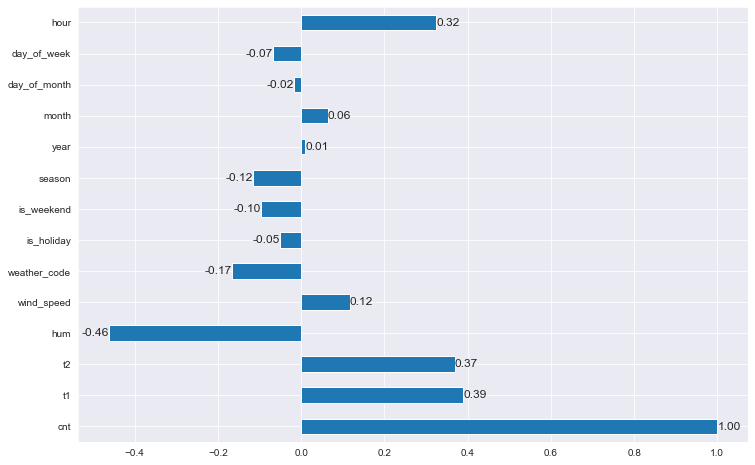

In [206]:
#with pandas

fig, ax = plt.subplots(figsize=(12,8))
df.corrwith(df['cnt']).plot(kind='barh')

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize = 12)

### 8. Plot bike shares over time use lineplot

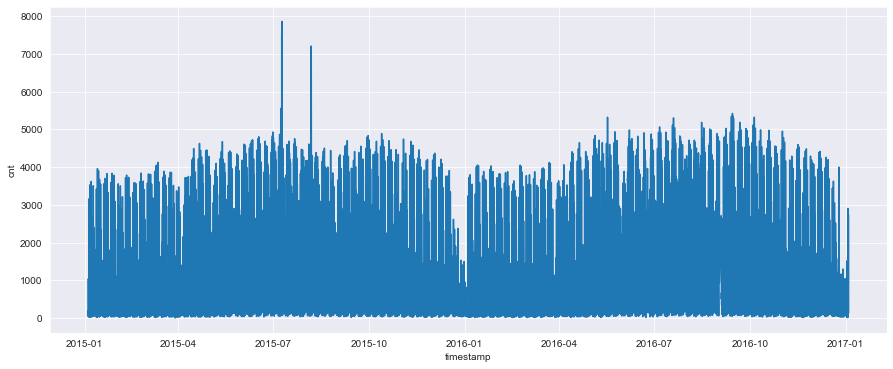

In [90]:
fig, ax =plt.subplots(figsize=(15,6))
sns.lineplot(x = df.index, y=df.cnt, data=df);

### 9. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [207]:
df.groupby("month")["cnt"].mean()

month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

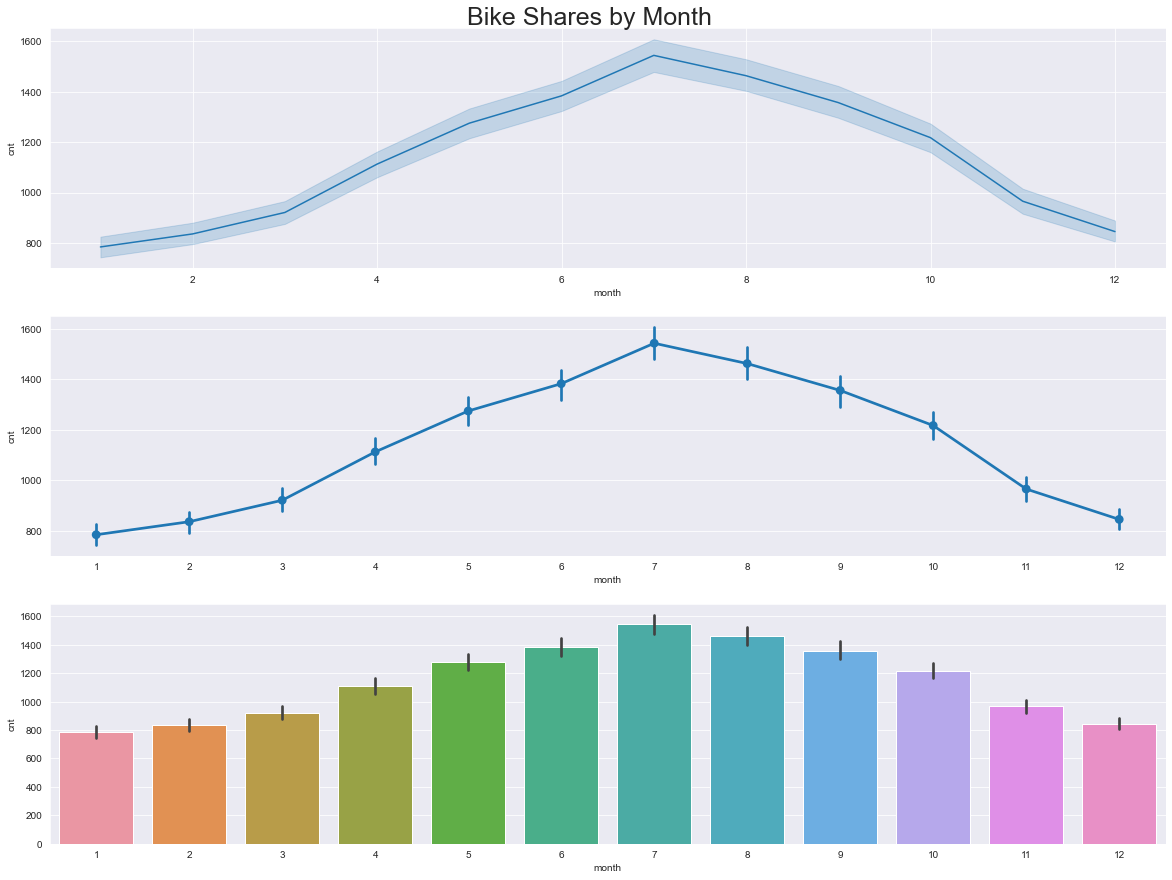

In [215]:
plt.figure(figsize=(20,15))

plt.suptitle("Bike Shares by Month", y= 0.90, fontsize=25)

plt.subplot(3,1,1)
sns.lineplot(x = "month", y= "cnt", data=df)
plt.subplot(3,1,2)
sns.pointplot(x = "month", y= "cnt", data=df)
plt.subplot(3,1,3)
sns.barplot(x = "month", y= "cnt", data=df)

ax.bar_label(ax.containers[0], fmt = "%.0f")

plt.show()

In [217]:
# OOM ile yearmontha gore yapalım
df.groupby("year_month")["cnt"].mean()

year_month
2015-01     814.663189
2015-02     810.125186
2015-03     941.723951
2015-04    1156.581363
2015-05    1203.512097
2015-06    1441.076709
2015-07    1514.441892
2015-08    1389.719086
2015-09    1255.243319
2015-10    1175.334239
2015-11     952.646976
2015-12     814.645946
2016-01     782.954301
2016-02     861.787791
2016-03     900.585734
2016-04    1069.325452
2016-05    1346.686828
2016-06    1324.649645
2016-07    1572.910931
2016-08    1536.910811
2016-09    1462.106881
2016-10    1259.362046
2016-11     978.941586
2016-12     876.220430
2017-01     523.333333
Name: cnt, dtype: float64

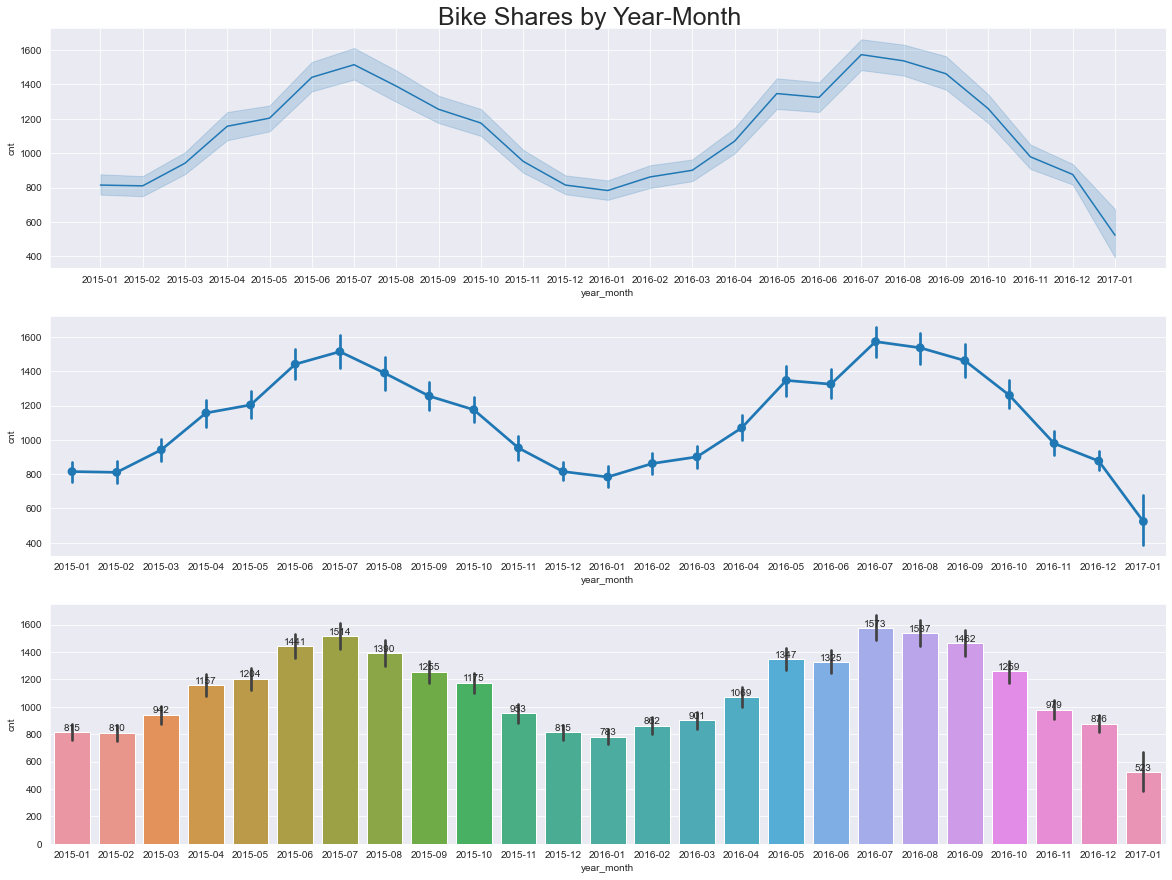

In [220]:


fig, ax = plt.subplots(nrows = 3, ncols=1, figsize=(20,15))

fig.suptitle("Bike Shares by Year-Month", y= 0.90, fontsize=25)


sns.lineplot(x = "year_month", y= "cnt", data=df, ax = ax[0])
sns.pointplot(x = "year_month", y= "cnt", data=df, ax = ax[1])
sns.barplot(x = "year_month", y= "cnt", data=df, ax = ax[2])

ax[2].bar_label(ax[2].containers[0], fmt = "%.0f")
# bar plotu ax 2 yaptigimiz icin ax 2 olarak guncellemeliyiz

plt.show()



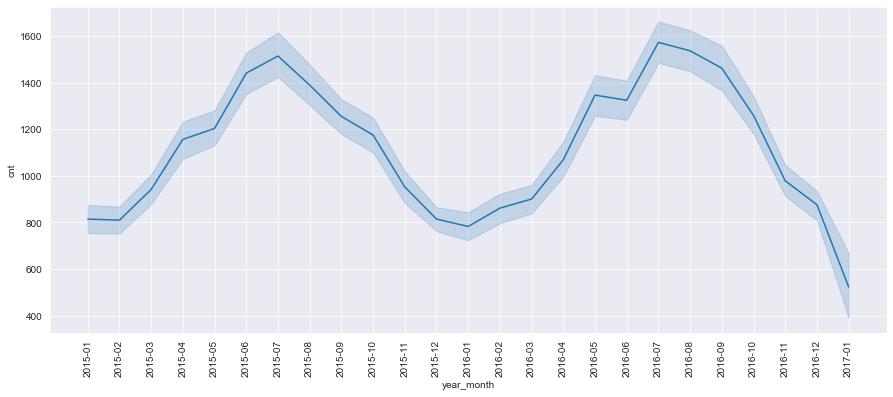

In [93]:
# with lineplot
fig, ax =plt.subplots(figsize=(15,6))
sns.lineplot(x = df.year_month, y=df.cnt, data=df)
plt.xticks(rotation="vertical");

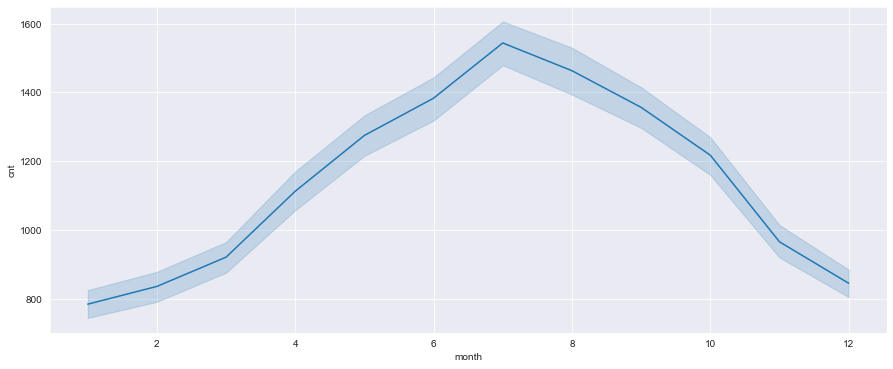

In [95]:
# with lineplot
fig, ax =plt.subplots(figsize=(15,6))
sns.lineplot(x = df.month, y=df.cnt, data=df);

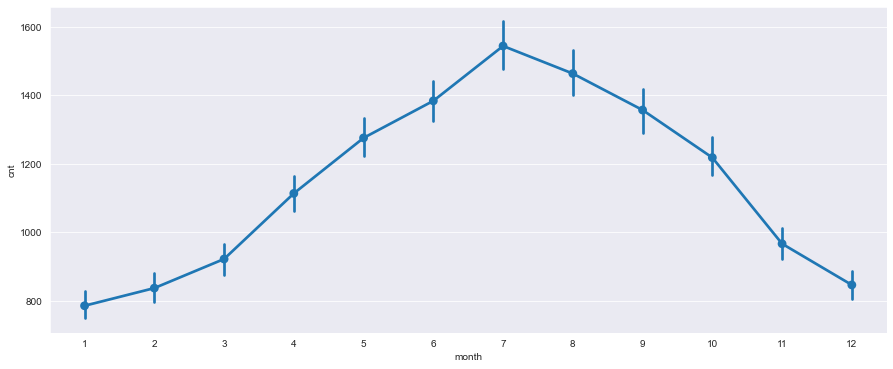

In [96]:
# with pointplot
fig, ax =plt.subplots(figsize=(15,6))
sns.pointplot(x = df.month, y=df.cnt, data=df);

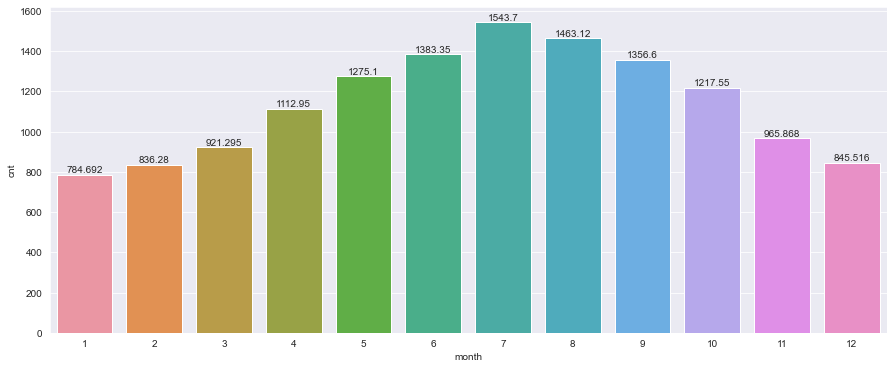

In [227]:
# with barplot
fig, ax =plt.subplots(figsize=(15,6))
sns.barplot(x = df.month, y=df.cnt, data=df, ci=None)
ax.bar_label(ax.containers[0]);

### 10. Plot bike shares by hours on (holidays, weekend, season)

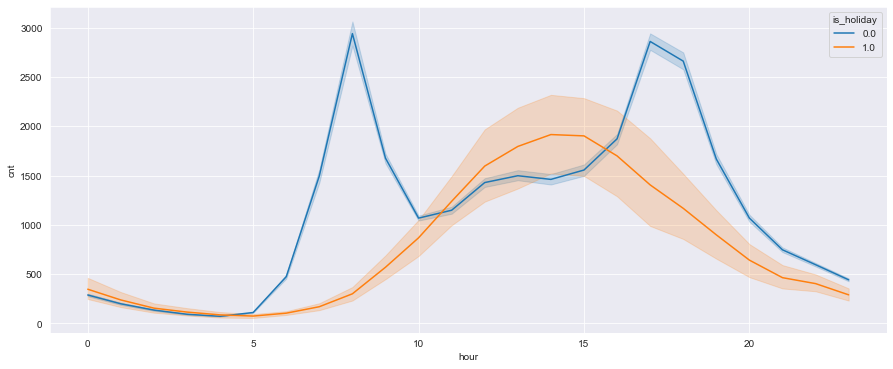

In [98]:
# with lineplot (*whether it is a holiday or not*)
fig, ax =plt.subplots(figsize=(15,6))
sns.lineplot(x = df.hour, y=df.cnt, hue = "is_holiday",data=df);

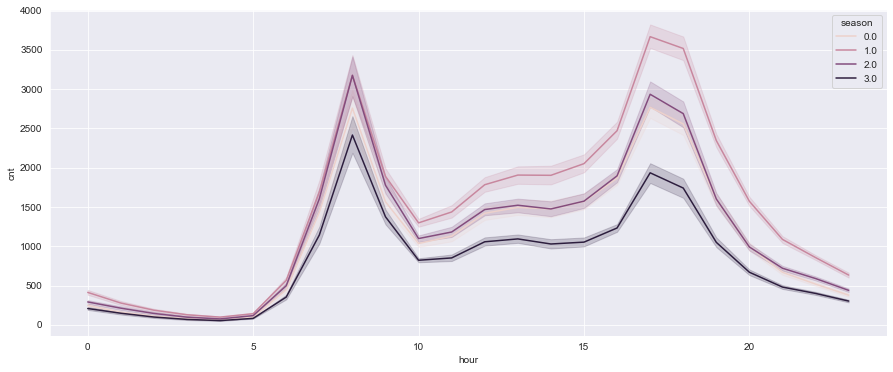

In [99]:
# with lineplot (*You may want to see seasonal breakdowns*)
fig, ax =plt.subplots(figsize=(15,6))
sns.lineplot(x = df.hour, y=df.cnt, hue = "season",data=df);

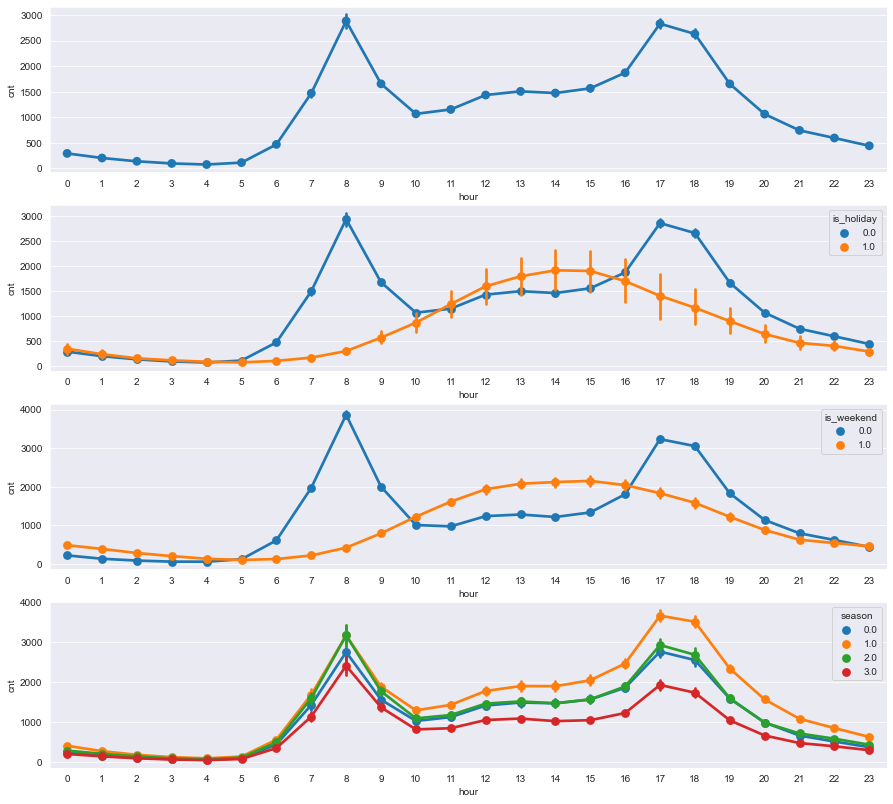

In [222]:
# with pointplot
fig, ax = plt.subplots(4,1, figsize=(15,14))

sns.pointplot(x = df.hour, y=df.cnt, data=df, ax=ax[0])
sns.pointplot(x = df.hour, y=df.cnt, data=df, hue="is_holiday", ax=ax[1])
sns.pointplot(x = df.hour, y=df.cnt, data=df, hue="is_weekend",ax=ax[2])
sns.pointplot(x = df.hour, y=df.cnt, data=df, hue="season",ax=ax[3]);

### 11. Plot bike shares by day of week
- You may want to see whether it is a holiday or not

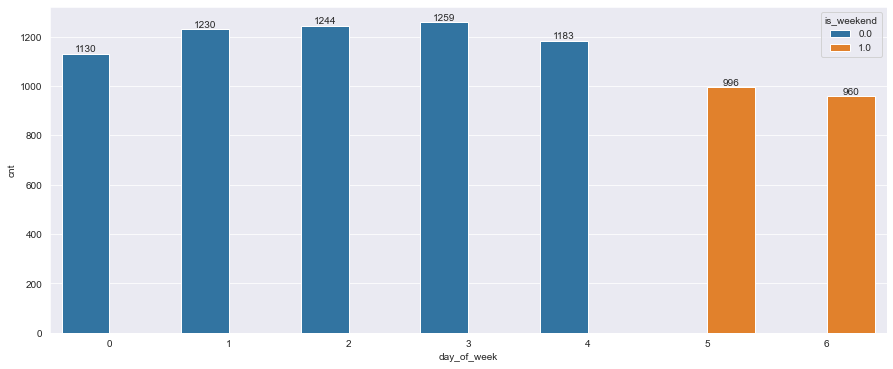

In [229]:
# with barplot
fig, ax =plt.subplots(figsize=(15,6))
sns.barplot(x = df.day_of_week, y=df.cnt, hue= "is_weekend", data=df, ci = None)
ax.bar_label(ax.containers[0], fmt = "%.0f")
ax.bar_label(ax.containers[1], fmt = "%.0f");

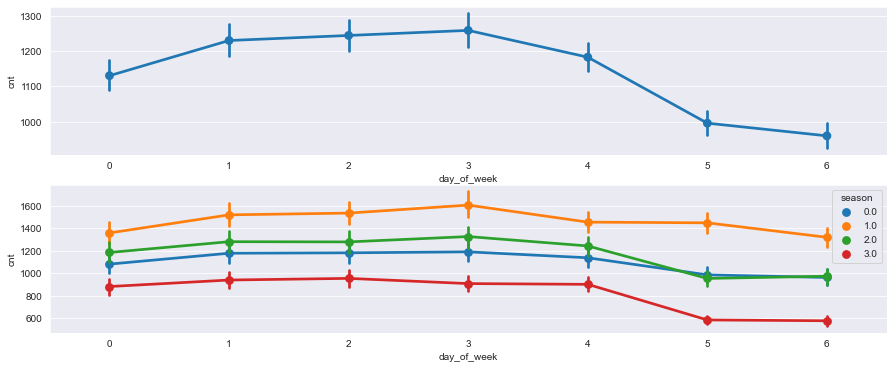

In [107]:
# with pointplot
fig, ax =plt.subplots(2,1,figsize=(15,6))
sns.pointplot(x = df.day_of_week, y=df.cnt, data=df, ax=ax[0])
sns.pointplot(x = df.day_of_week, y=df.cnt, hue= "season", data=df, ax=ax[1]);

### 12. Plot bike shares by day of month

In [230]:
dom = pd.DataFrame(df.groupby("day_of_month")["cnt"].mean().apply(lambda x : round(x))).rename_axis("dom")
dom

,cnt
dom,
1,1077
2,1088
3,1128
4,1144
5,1141
6,1211
7,1194
8,1223
9,1261


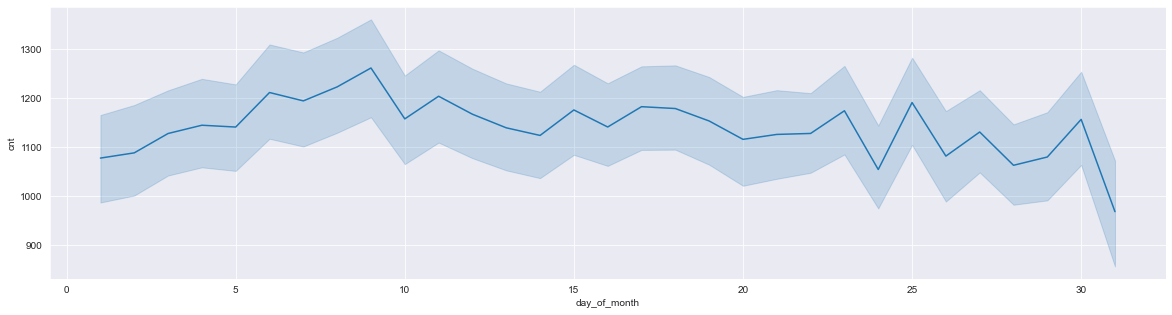

In [231]:

plt.figure(figsize = (20,5))
sns.lineplot(x = df["day_of_month"], y = df["cnt"]);

dom,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


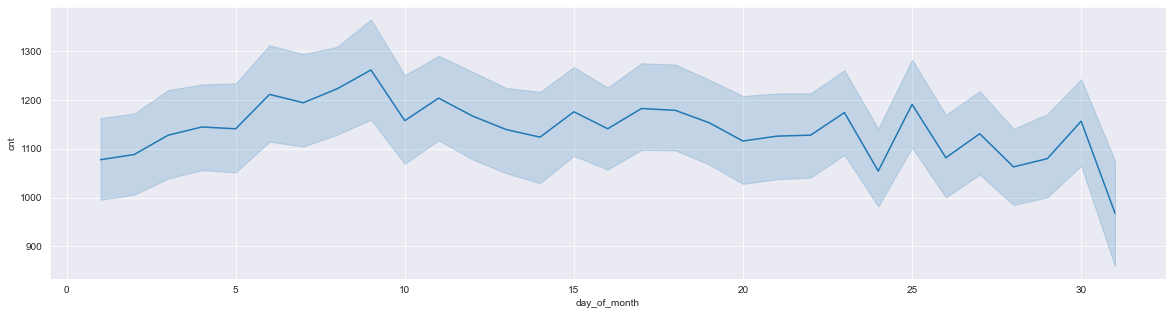

In [235]:
plt.figure(figsize = (20,5))
sns.lineplot(x = df["day_of_month"], y = df["cnt"])
pd.set_option('display.max_columns', None)
dom.T

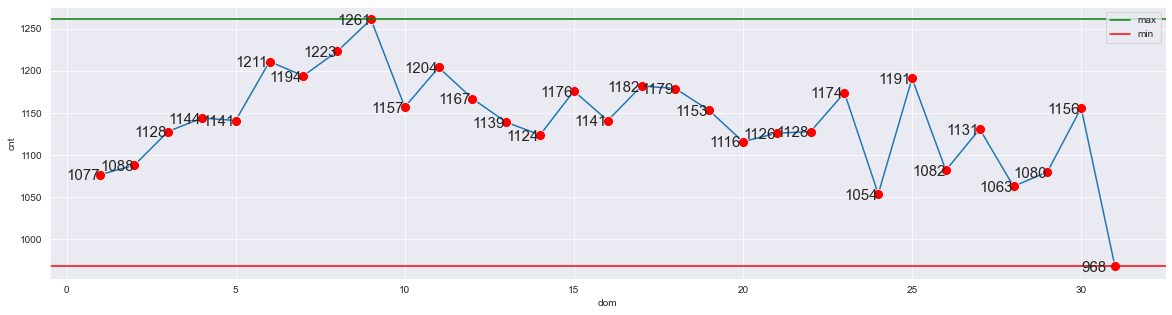

In [236]:
plt.figure(figsize=(20,5))

sns.lineplot(x = dom.index, y = dom.cnt, linestyle = "-", marker = "o", markerfacecolor = "r", markersize = 10)
plt.axhline(1261, c = "g", label = "max")
plt.axhline(968, c = "r", label = "min")
plt.legend(loc = 1)

for index, value in enumerate(dom.cnt.values):
    plt.text(index, value, str(value), va = "center_baseline", ha = "left", fontsize = 15)

### 13. Plot bike shares by year
### Plot bike shares on holidays by seasons

In [125]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,year_month
timestamp,,,,,,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01


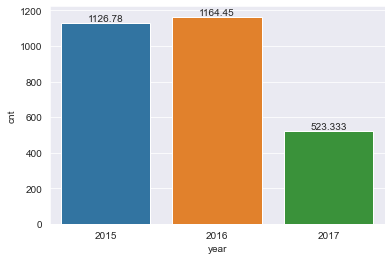

In [239]:
# with barplot
fig, ax = plt.subplots()
sns.barplot(x="year", y="cnt", data=df, ci=None)
ax.bar_label(ax.containers[0]);

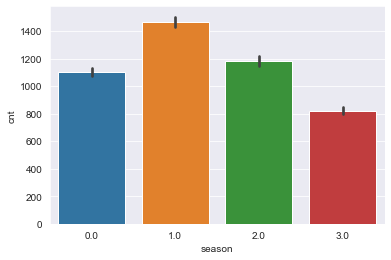

In [127]:
# with barplot
sns.barplot(x="season", y="cnt", data=df);

In [128]:
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

### 14. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [129]:
df.is_weekend.value_counts()


0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

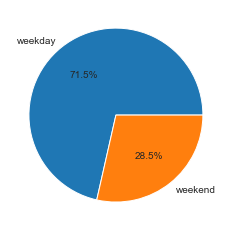

In [136]:
# pie chart
plt.pie(df.is_weekend.value_counts().values, labels = ["weekday", "weekend"], autopct="%.1f%%");

<AxesSubplot:ylabel='count'>

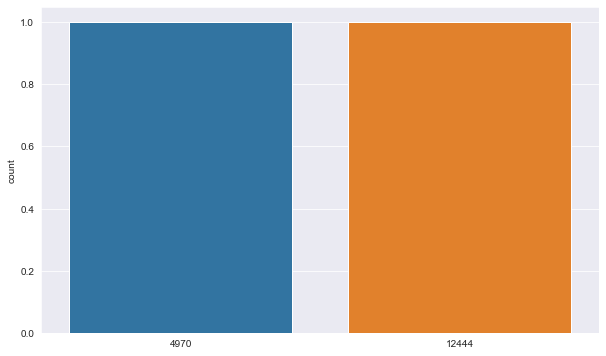

In [244]:
# with countplot
fig, ax =plt.subplots(figsize=(10,6))
sns.countplot(df.is_weekend.value_counts().values)
# plt.xticks([4970, 12444],["0.0", "1.0"]);

### 15. Plot the distribution of weather code by seasons

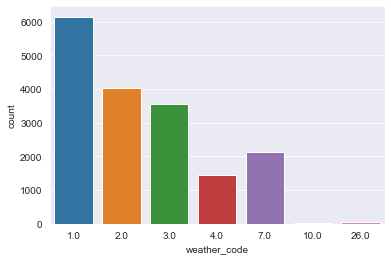

In [147]:
# with countplot
sns.countplot(x = "weather_code", data=df);

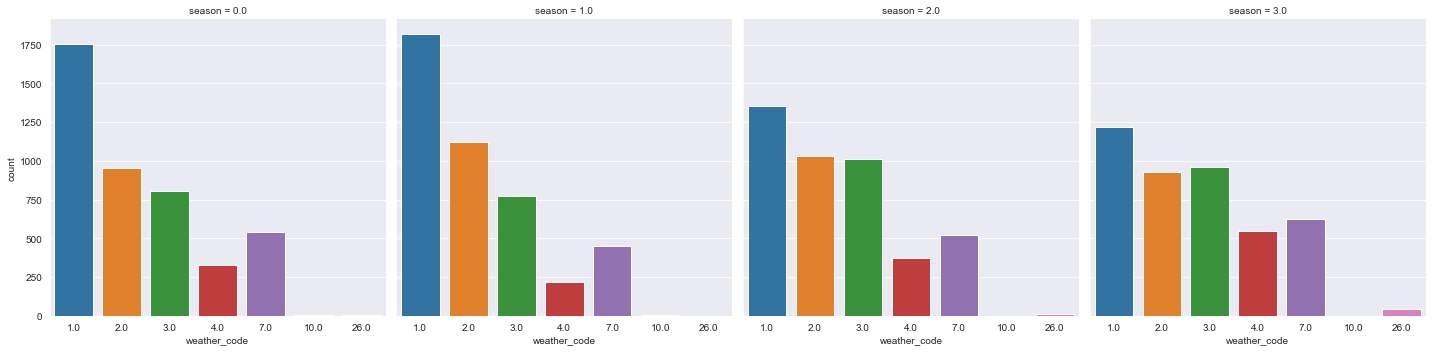

In [149]:
# with catplot

sns.catplot(x = "weather_code", data=df, col="season", kind="count");

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

___